## Pandas

### Instructions

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv, groceries.csv

In [2]:
# Imports needed to complete this assignment
import pandas as pd

### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [3]:
#q1 (1)
alumni = pd.read_csv('alumni.csv')

### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [4]:
#a) (1)
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [5]:
#b) (1)
alumni.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [39]:
#c) (1)
alumni.dtypes

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [40]:
#d) (1)
alumni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [41]:
#e) (1)
alumni.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [6]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")
 

66000.0

In [7]:
alumni['Savings'] = alumni['Savings ($)'].apply(lambda x: f"{clean_currency(x)}")
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0


In [8]:
alumni['Savings']= pd.to_numeric(alumni['Savings'])


In [9]:
alumni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Graduated  88 non-null     int64  
 1   Gender          88 non-null     object 
 2   Marital Status  88 non-null     object 
 3   Diploma Type    88 non-null     object 
 4   Defaulted       88 non-null     object 
 5   Salary          88 non-null     int64  
 6   Fee             88 non-null     int64  
 7   Savings ($)     88 non-null     object 
 8   Savings         88 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 6.3+ KB


b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [10]:
#b) (1)
alumni.dtypes.Savings


dtype('float64')

### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [11]:
# a) (1)
alumni["Gender"].value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [12]:
#storing data rows with issues in a temporary data frame for seperation 
temp_dfgender = alumni.loc[(alumni['Gender'] != "Male") & (alumni["Gender"] != "Female")]

In [13]:
temp_dfgender

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
28,2007,M,Married,Standard Diploma,Yes,75000,11326,"$46,000",46000.0
35,2008,M,Single,Standard Diploma,Yes,65000,12058,"$26,000",26000.0
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000",72000.0


In [14]:
#seperating the original data frame from data rows with issues 
alumni = alumni.loc[(alumni['Gender'] != "M")]

In [15]:
alumni


,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0
...,...,...,...,...,...,...,...,...,...
82,2006,Male,Married,College Prep Diploma,No,65000,12066,"$37,000",37000.0
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000",16000.0
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000",46000.0
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000",32000.0


In [16]:
#correcting the errors in the gender column within the temporary dataframe
temp_dfgender['Gender'] = temp_dfgender['Gender'].replace('M' ,'Male')

In [17]:
temp_dfgender

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
28,2007,Male,Married,Standard Diploma,Yes,75000,11326,"$46,000",46000.0
35,2008,Male,Single,Standard Diploma,Yes,65000,12058,"$26,000",26000.0
84,2008,Male,Single,College Prep Diploma,Yes,65000,12066,"$72,000",72000.0


c) That didn't the set alumni["Gender"] column however. You will need to update the column when using the replace command 'alumni["Gender"]=<replace command>', show how this is done below

In [18]:
#merging the original dataframe with the temporary data frame containing the corrected data rows
alumni =pd.concat([temp_dfgender, alumni])
alumni

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
28,2007,Male,Married,Standard Diploma,Yes,75000,11326,"$46,000",46000.0
35,2008,Male,Single,Standard Diploma,Yes,65000,12058,"$26,000",26000.0
84,2008,Male,Single,College Prep Diploma,Yes,65000,12066,"$72,000",72000.0
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
...,...,...,...,...,...,...,...,...,...
82,2006,Male,Married,College Prep Diploma,No,65000,12066,"$37,000",37000.0
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000",16000.0
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000",46000.0
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000",32000.0


In [19]:
#check if the rows have been merged
alumni.shape


(88, 9)

d) You can set it directly by using the df.loc command, show how this can be done by using the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'

In [20]:
#using the already known indexes of rows we need to change (28,35,84)

alumni.loc[28,'Gender'] = "Male"
alumni.loc[35,'Gender'] = "Male"
alumni.loc[84,'Gender'] = "Male"

e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [21]:
# e) (1)
alumni["Gender"].value_counts()


Male      49
Female    39
Name: Gender, dtype: int64

### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [22]:
import numpy as np 

In [23]:
#creating a series from the salary column
salaryMatrix = alumni['Salary']

In [24]:
#creating a numpy array from the salary series
arr = np.array(salaryMatrix)

In [25]:
# a)(1)
np.median(arr)


75000.0

In [26]:
# b)(1)
np.mean(arr)

84090.90909090909

In [27]:
# c)(1)
np.std(arr)

21113.134840897437

d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [28]:
# d) (1)
alumni.loc[(alumni['Fee']) > 15000]

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
18,2006,Male,Married,Standard Diploma,No,140000,20960,"$72,000",72000.0


### Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

In [29]:
#a) (1)
x = alumni['Diploma Type'].value_counts()

In [30]:
z = alumni['Diploma Type'].unique().tolist()

In [31]:
z

['Standard Diploma', 'College Prep Diploma']

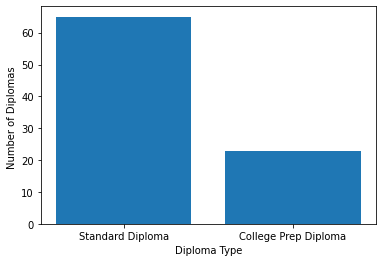

In [32]:
import matplotlib.pyplot as plt
plt.bar(z,x)
plt.ylabel('Number of Diplomas ')
plt.xlabel('Diploma Type')
plt.show()

b) Now create a box plot comparison between 'Savings' and 'Salary' columns

In [33]:
#b) (1)
data_1 = alumni['Savings']
data_2 = alumni['Salary']
data = [data_1, data_2]


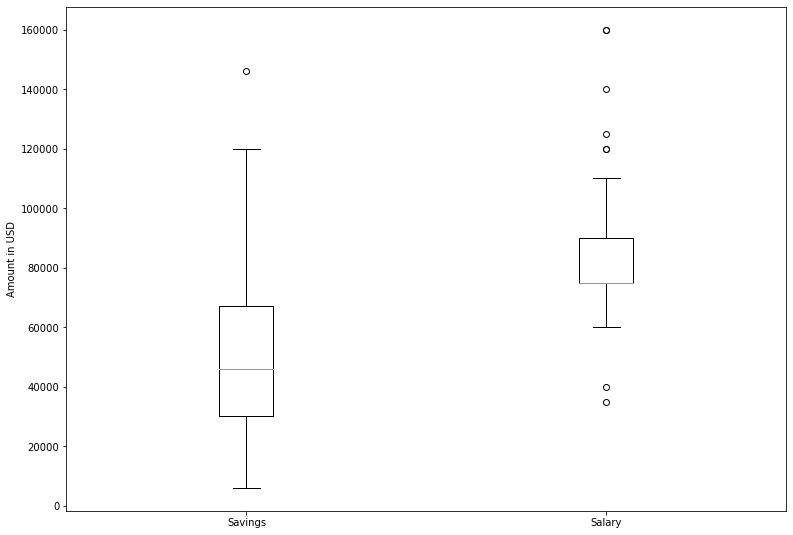

In [34]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data)



# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# x-axis labels
ax.set_xticklabels(['Savings', 'Salary'])
ax.set_ylabel('Amount in USD')
 

# show plot

plt.show()

c) Generate a histogram with the 'Salary' column and use 12 bins.

(array([ 2.,  0., 17., 27.,  8., 17.,  4.,  7.,  3.,  0.,  1.,  2.]),
 array([ 35000.        ,  45416.66666667,  55833.33333333,  66250.        ,
         76666.66666667,  87083.33333333,  97500.        , 107916.66666667,
        118333.33333333, 128750.        , 139166.66666667, 149583.33333333,
        160000.        ]),
 <a list of 12 Patch objects>)

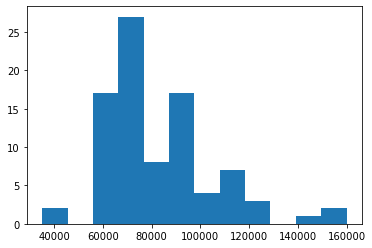

In [35]:
#c) (1)

histdata = alumni['Salary']
bins = 12

plt.hist(histdata, bins)

d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

In [36]:
#d) (1)

xscatter = alumni['Salary']
yscatter = alumni['Savings']


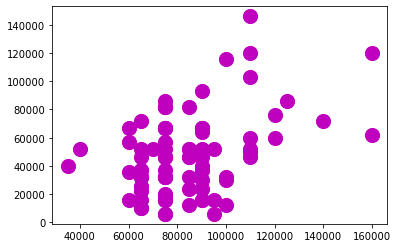

In [39]:
plt.scatter(xscatter,yscatter, s=200 , color = 'm')

### Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [41]:
# Q7 (2)


pd.crosstab(alumni['Marital Status'],alumni['Defaulted'], margins = True, margins_name = "Total")

Defaulted,No,Yes,Total
Marital Status,,,
Divorced,8,11,19
Married,19,16,35
Single,9,25,34
Total,36,52,88
